<div>
    <img src="https://github.com/qusayabuhaya/project2/blob/main/ddf7cdb08137fb05e6b9947d932d518c.png?raw=true" width="400"/>
</div>

## ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
##  פרוייקט גמר- ניתוח נתונים
### קבוצה מספר 6 
## "Fifa_23_Player_data_analysis" : שם הדאטה
#### מגישים: רוני בן נון, קוסאי אבו חיה וינון סקעת
#####  https://www.kaggle.com/code/faresabbasai2022/fifa-23-player-data-analysis- קישור לדאטה
## __________________________________________________
## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline



In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/qusayabuhaya/project2/main/Fifa%2023%20Players%20Data.csv")
data.head(5)



,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [18]:
data.shape


(18539, 89)

### נבדוק תאים חסרים בדאטה
#### <<<<<<<<<<<<<<<<<<<<

In [19]:
data.isnull().sum().sort_values(ascending=False)


Known As                    0
Freekick Accuracy           0
Standing Tackle             0
Marking                     0
Composure                   0
                           ..
National Team Position      0
National Team Image Link    0
National Team Name          0
International Reputation    0
GK Rating                   0
Length: 89, dtype: int64

In [20]:
data.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

##  שלב ראשון:  בדקנו את אחוז השחקנים השמאליים ביחס לשחקנים הימניים 

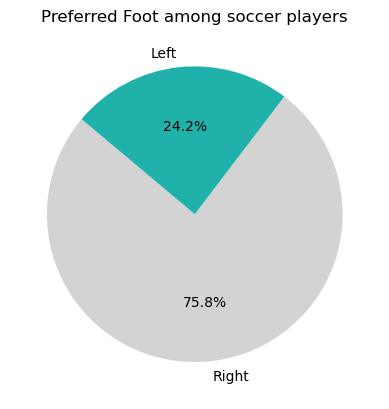

In [21]:
total_players = len(data)
right_players = data[data['Preferred Foot'] == 'Right']
left_players = data[data['Preferred Foot'] == 'Left']

right_percent = (len(right_players) / total_players) * 100
left_percent = (len(left_players) / total_players) * 100

labels = ['Right', 'Left']
sizes = [right_percent, left_percent]
colors = ['#D3D3D3','lightseagreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Preferred Foot among soccer players')
plt.show()



## שלב שני: השוונו את הנתונים שמצאנו ביחס לנתונים של אוכלוסיית העולם

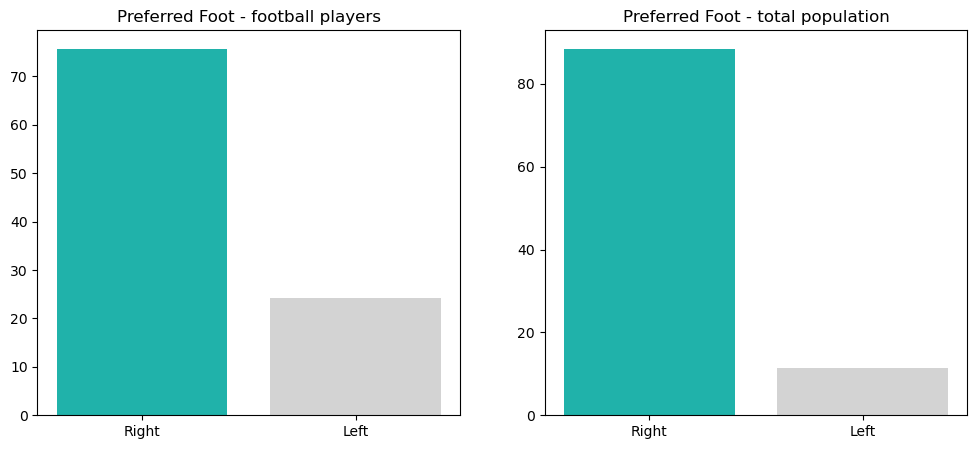

In [22]:
colors_footballers = ['lightseagreen', '#D3D3D3']
colors_population = ['lightseagreen', '#D3D3D3']
#https://he.wikipedia.org/wiki/%D7%A9%D7%9E%D7%90%D7%9C%D7%99%D7%95%D7%AA (קישור לויקיפדיה)
right_left_percentages=[88.5,11.5]


plt.figure(figsize=(12, 5))  

 
plt.subplot(1, 2, 1) 
plt.bar(labels, sizes, color=colors_footballers)
plt.title('Preferred Foot - football players')


plt.subplot(1, 2, 2) 
plt.bar(['Right', 'Left'], right_left_percentages, color=colors_population)
plt.title('Preferred Foot - total population')

plt.show()


## מסקנה ראשונה:  ניתן לראות לפי הגרפים שבככל האוכלוסייה יש 11.5% שמאליים ו 88.5%  ימניים, ובשחקני כדורגל גילינו שיש 24.2% שמאליים ו 75.8% ימניים. אפשר להבין כי חלק גדול מהאוכלוסייה השמאלית הם שחקני כדורגל
## ________________________________________________________________________________________


### גרף המציג את כמות השחקנים מכל מדינה 
### <<<<<<<<>>>>>>>

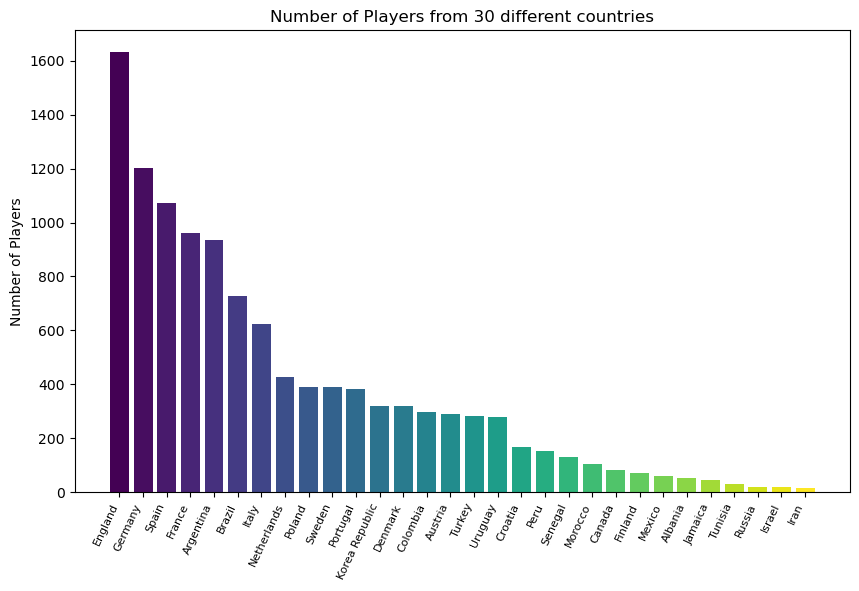

In [23]:
countries = ['England', 'Israel', 'France', 'Argentina', 'Poland', 'Brazil', 'Korea Republic', 'Senegal', 'Germany',
             'Italy', 'Portugal', 'Croatia', 'Spain', 'Netherlands', 'Austria', 'Colombia', 'Uruguay',
             'Morocco', 'Finland', 'Mexico', 'Sweden', 'Turkey', 'Iran', 'Canada', 'Russia', 'Tunisia',
             'Peru', 'Jamaica', 'Albania', 'Denmark']

players_count = [len(data[data['Nationality'] == country]) for country in countries]


sorted_countries = sorted(zip(countries, players_count), key=lambda x: x[1], reverse=True)
sorted_countries_names, sorted_players_count = zip(*sorted_countries)

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))

bars = plt.bar(sorted_countries_names, sorted_players_count, color=colors)

plt.ylabel('Number of Players', fontsize=10)

plt.title('Number of Players from 30 different countries', fontsize=12)

plt.xticks(rotation=65, ha='right', fontsize=8)

plt.show()


### טבלת קורולאציה
### ==========

In [24]:

coll= ['Overall','Composure','Value(in Euro)','Age','Height(in cm)','Weight(in kg)','Stamina','Long Shots','Dribbling','Physicality Total'] 
mat= data[coll].corr()
mat

,Overall,Composure,Value(in Euro),Age,Height(in cm),Weight(in kg),Stamina,Long Shots,Dribbling,Physicality Total
Overall,1.000000,0.700583,0.561642,0.442369,0.033137,0.131420,0.376994,0.392187,0.376185,0.560813
Composure,0.700583,1.000000,0.391234,0.348245,-0.184355,-0.093747,0.600649,0.676280,0.693641,0.379521
Value(in Euro),0.561642,0.391234,1.000000,0.030662,0.008028,0.027106,0.197522,0.227479,0.241773,0.234945
Age,0.442369,0.348245,0.030662,1.000000,0.066684,0.217895,0.133382,0.155305,0.024946,0.440695
Height(in cm),0.033137,-0.184355,0.008028,0.066684,1.000000,0.754845,-0.300078,-0.399726,-0.480466,0.409400
Weight(in kg),0.131420,-0.093747,0.027106,0.217895,0.754845,1.000000,-0.230124,-0.303243,-0.403796,0.490947
Stamina,0.376994,0.600649,0.197522,0.133382,-0.300078,-0.230124,1.000000,0.615402,0.714146,0.428728
Long Shots,0.392187,0.676280,0.227479,0.155305,-0.399726,-0.303243,0.615402,1.000000,0.856248,0.065896
Dribbling,0.376185,0.693641,0.241773,0.024946,-0.480466,-0.403796,0.714146,0.856248,1.000000,0.023372
Physicality Total,0.560813,0.379521,0.234945,0.440695,0.409400,0.490947,0.428728,0.065896,0.023372,1.000000


<Axes: >

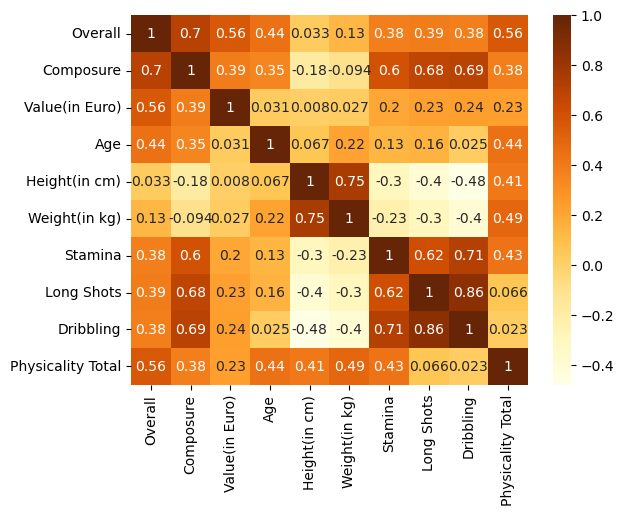

In [25]:
sns.heatmap(data=mat, cmap='YlOrBr', annot=True )

## רצינו לבדוק איך אפשר לשפר את היכולות של שחקן הכדורגל 
### :::::::::::::::::::::::::::::::::::::::::::::::::::::

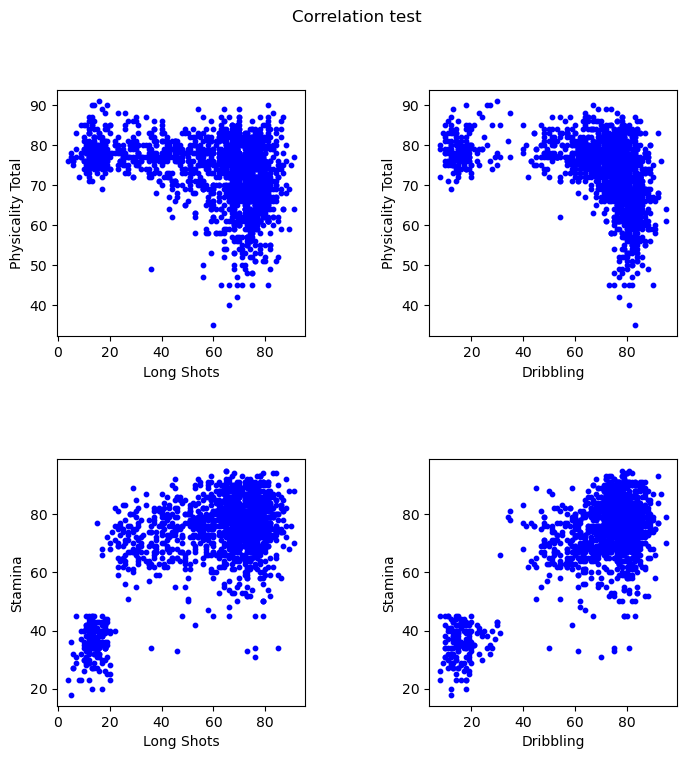

In [26]:
plt.figure(figsize=(8, 8))
players = data[0:1500]
plt.subplot(2, 2, 1)
plt.scatter(players['Long Shots'], players['Physicality Total'], color='blue', s=10)
plt.xlabel('Long Shots')
plt.ylabel('Physicality Total')

plt.subplot(2, 2, 2)
plt.scatter(players['Dribbling'], players['Physicality Total'], color='blue', s=10)
plt.xlabel('Dribbling')
plt.ylabel('Physicality Total')


plt.subplot(2, 2, 3)
plt.scatter(players['Long Shots'], players['Stamina'], color='blue', s=10)
plt.xlabel('Long Shots')
plt.ylabel('Stamina')


plt.subplot(2, 2, 4)
plt.scatter(players['Dribbling'], players['Stamina'], color='blue', s=10)
plt.xlabel('Dribbling')
plt.ylabel('Stamina')


plt.suptitle('Correlation test')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()


## :מסקנה שנייה 
#####  בגרף הראשון מצד ימין ניתן לראות שיש קשר חלש בין כדרור ליכולות הפיזיות של השחקן, כך גם אנו רואים שבגרף השמאלי יש קשר חלש בין היכולת בעיטה מרחוק ליכולות פיזיות של השחקן
##### בגרף השלישי מימין ניתן לראות כי יש קשר חזק בין הכדרור לסיבולת של השחקן, וכי בגרף האחרון רואים שגם יש קשר חזק בין יכולת הבעיטה מרחוק לבין הסיבולת של השחקן
### מכאן אנו מסיקים שאם שחקן רוצה לשפר את הכדרור ואת היכולת בעיטה מרחוק שלו ,נמליץ לו לחזק את הסיבולת ולא דווקא את היכולת הפיזית שלו

## __________________________________________________________________________________

#### תמונה המציגה את עמדות השחקנים
## .............................................

<div>
    <img src="https://github.com/qusayabuhaya/project2/blob/main/WhatsApp%20Image%202024-02-26%20at%201.33.25%20PM.jpeg?raw=true" width="700"/>
</div>

In [27]:
def count_players_by_position(position):
    return len(data[(data['Positions Played'].str.contains(position, na=False)) & (data['Wage(in Euro)'] != 0)])

positions = ['GK', 'CB', 'RB', 'LB', 'CDM', 'CM', 'RM', 'LM', 'CAM', 'RW', 'LW', 'CF', 'ST']

total_players = {position: count_players_by_position(position) for position in positions}

print(total_players)

{'GK': 2042, 'CB': 3910, 'RB': 1920, 'LB': 1839, 'CDM': 2833, 'CM': 4168, 'RM': 2265, 'LM': 2262, 'CAM': 2170, 'RW': 1800, 'LW': 1812, 'CF': 417, 'ST': 3213}


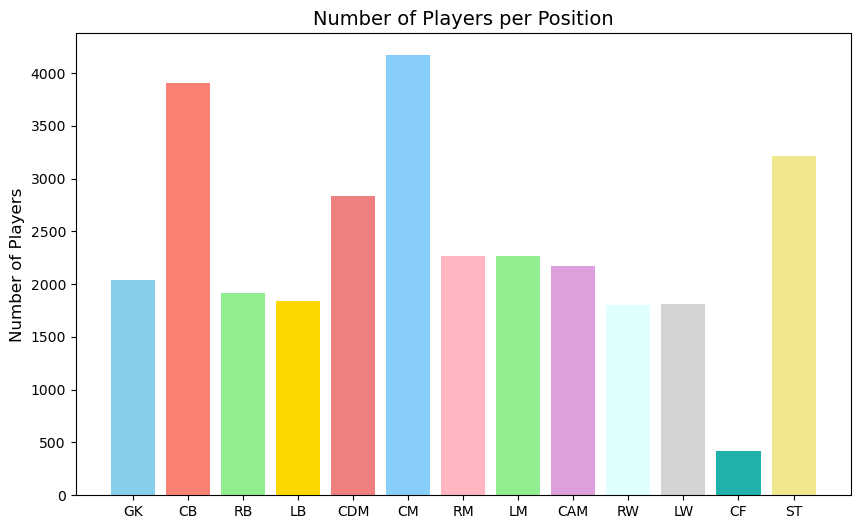

In [28]:

colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgreen', 'plum', 'lightcyan', 'lightgrey', 'lightseagreen', 'khaki']

plt.figure(figsize=(10, 6))

bars = plt.bar(total_players.keys(), total_players.values(), color=colors)

plt.ylabel('Number of Players', fontsize=12)

plt.title('Number of Players per Position', fontsize=14)

plt.show()

### בגרף הראשון ניתן לראות את מספר השחקנים לפי כל עמדה במגרש וגילינו שמספר השחקנים הנמוך ביותר הוא של שחקן שתפקידו חלוץ מרכזי 

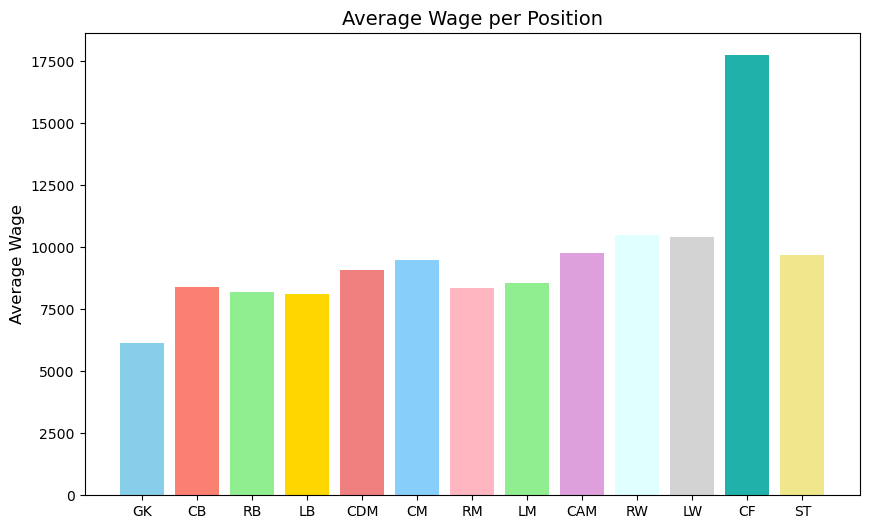

In [29]:

def average_wage_by_position(position):
    position_players = data[data['Positions Played'].str.contains(position, na=False)]
    average_wage = position_players['Wage(in Euro)'].mean()
    return average_wage

positions = ['GK', 'CB', 'RB', 'LB', 'CDM', 'CM', 'RM', 'LM', 'CAM', 'RW', 'LW', 'CF', 'ST']


average_wages = {position: average_wage_by_position(position) for position in positions}

colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgreen', 'plum', 'lightcyan', 'lightgrey', 'lightseagreen', 'khaki']

plt.figure(figsize=(10, 6))

bars = plt.bar(average_wages.keys(), average_wages.values(), color=colors)

plt.ylabel('Average Wage', fontsize=12)

plt.title('Average Wage per Position', fontsize=14)

plt.show()

### בגרף השני ניתן לראות את ממוצע השכר השבועי של השחקן לפי כל עמדה, שחקן חלוץ מרכזי מרוויח הכי הרבה 

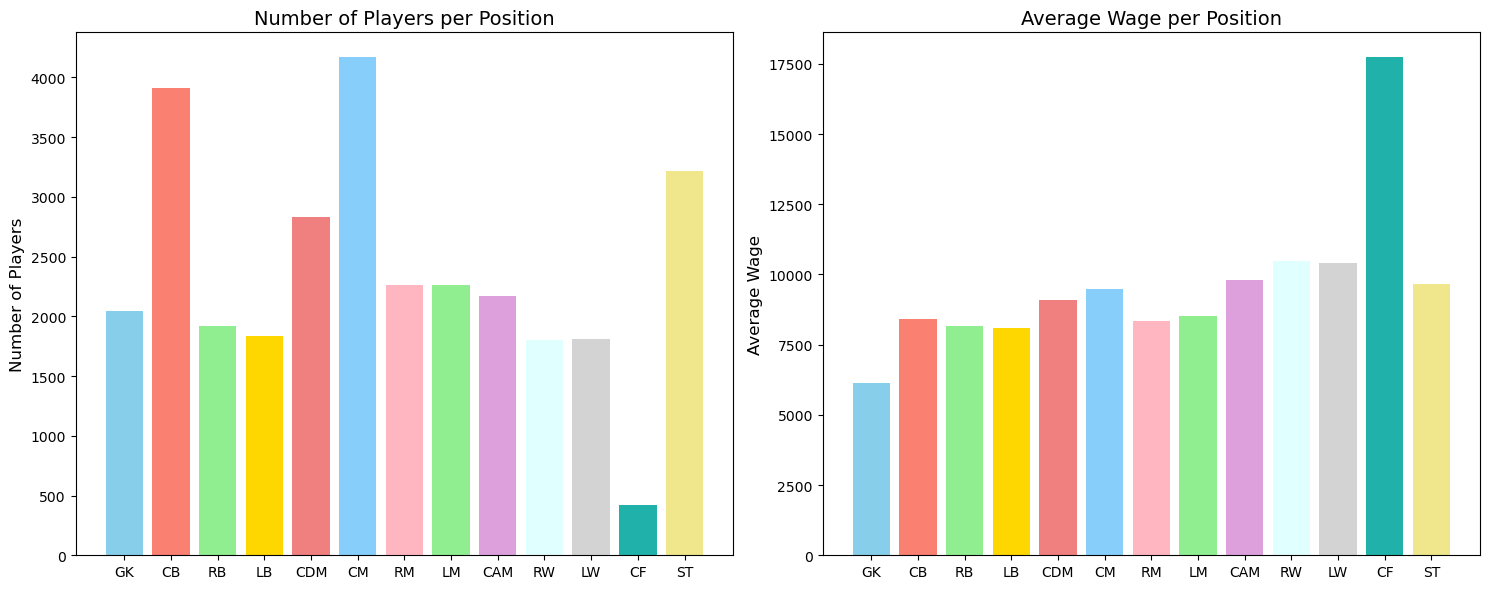

In [30]:

colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgreen', 'plum', 'lightcyan', 'lightgrey', 'lightseagreen', 'khaki']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bars1 = plt.bar(total_players.keys(), total_players.values(), color=colors)
plt.ylabel('Number of Players', fontsize=12)
plt.title('Number of Players per Position', fontsize=14)


average_wages = {position: average_wage_by_position(position) for position in positions}

colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgreen', 'plum', 'lightcyan', 'lightgrey', 'lightseagreen', 'khaki']

plt.subplot(1, 2, 2)
bars2 = plt.bar(average_wages.keys(), average_wages.values(), color=colors)
plt.ylabel('Average Wage', fontsize=12)
plt.title('Average Wage per Position', fontsize=14)

plt.tight_layout()
plt.show()

## מסקנה שלישית:  שחקן חלוץ מרכזי מרוויח הכי הרבה 
### עוד תובנות מתוך הגרף- השחקנים המרכזיים-  מרוויחים הכי הרבה מתוך הקטגוריה שלהם
##### קטגוריה ראשונה: התקפה- חלוץ מרכזי
##### קטגוריה שנייה: קישור- קשר מרכזי התקפי
##### קטגוריה שלישית: הגנה- בלם מרכזי
### >>>>>>><<<<<<<

<!-- ![image.png](attachment:692173df-5767-4863-abea-33691e991f3a.png)! -->